In [1]:
import pandas as pd
from fbprophet import Prophet

df_init = pd.read_csv("/Users/brandosocarras/Documents/IEEE_20/Stock_Predictions/data/GOOGLE_FIN_5YR_A.csv")

df_init = df_init[df_init['Stock'] == 'A']
df_init.tail()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


,Stock,Date,Open,High,Low,Close,Volume
1254,A,2/10/20,83.04,84.64,82.93,84.43,2066861
1255,A,2/11/20,85.03,85.67,84.84,85.09,1543233
1256,A,2/12/20,85.40,86.06,85.29,85.43,1464200
1257,A,2/13/20,85.10,85.68,84.66,85.47,1596270
1258,A,2/14/20,85.72,85.86,85.12,85.82,1965430


In [2]:
# prophet requires two columns with specific names, dates = 'ds', data = 'y'
# With this data, 'y' is the change in stock price over  ||1 day||
df_open= pd.DataFrame({'ds':df_init['Date'], 'y':df_init['Open']})
df_open.head()


df_close= pd.DataFrame({'ds':df_init['Date'], 'y':df_init['Close']})
df_close.head()

,ds,y
0,2/17/15,40.52
1,2/18/15,41.54
2,2/19/15,41.15
3,2/20/15,41.95
4,2/23/15,41.73


In [3]:
# Adding US holidays for prophet to consider
m = Prophet()
m.add_country_holidays(country_name='US')

# Fit linear trend to data and generate future dates
m.fit(df_close)
future = m.make_future_dataframe(periods=20, freq='W')
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1354,2021-12-12
1355,2021-12-19
1356,2021-12-26
1357,2022-01-02
1358,2022-01-09


In [4]:
# create forecast
forecast_close = m.predict(future)
forecast_close[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1354,2021-12-12,103.751037,59.175018,149.178590
1355,2021-12-19,103.517014,57.817596,148.376765
1356,2021-12-26,103.566587,57.498312,151.127244
1357,2022-01-02,104.396011,57.556820,152.346182
1358,2022-01-09,105.767437,58.510372,153.936465


In [5]:
p = Prophet()
p.add_country_holidays(country_name='US')

# Fit linear trend to data and generate future dates
p.fit(df_open)
future = p.make_future_dataframe(periods=20, freq='W')
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1274,2020-05-31
1275,2020-06-07
1276,2020-06-14
1277,2020-06-21
1278,2020-06-28


In [6]:
# create forecast
forecast_open = p.predict(future)
forecast_open[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1274,2020-05-31,84.203273,80.161724,88.145214
1275,2020-06-07,84.562438,80.414600,88.807149
1276,2020-06-14,84.751960,80.417185,89.203786
1277,2020-06-21,84.564504,80.116113,88.941253
1278,2020-06-28,84.213878,79.597801,88.668807


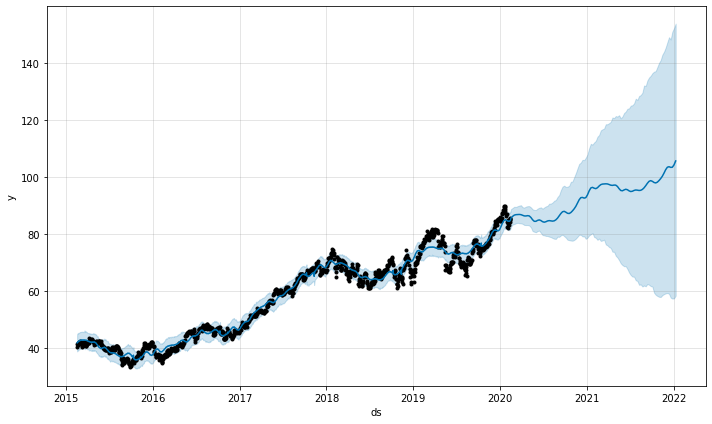

In [7]:
fig1 = m.plot(forecast_close)

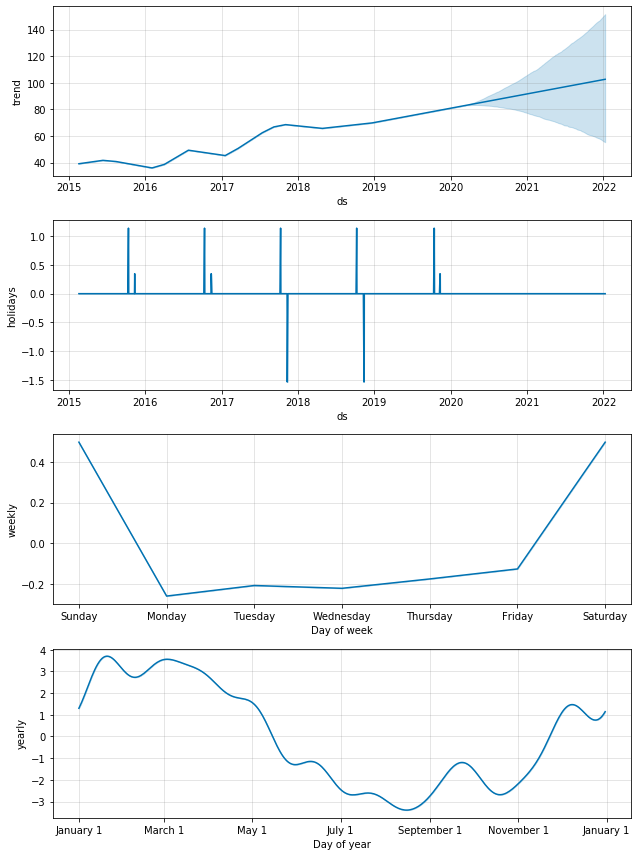

In [8]:
# plot some subplots from df data + forecast
fig3 = m.plot_components(forecast_close)

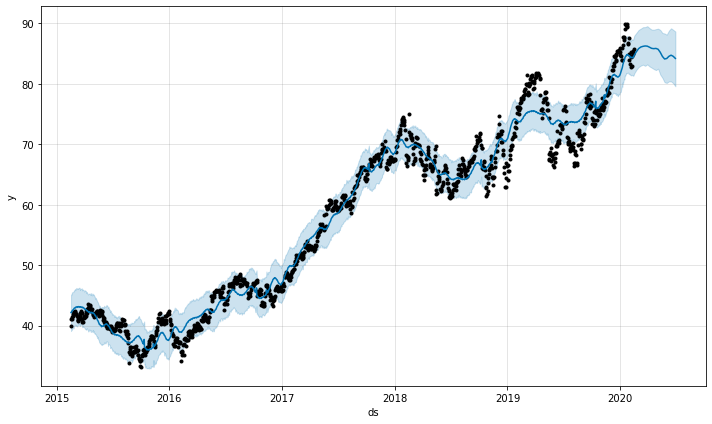

In [9]:
fig3 = p.plot(forecast_open)

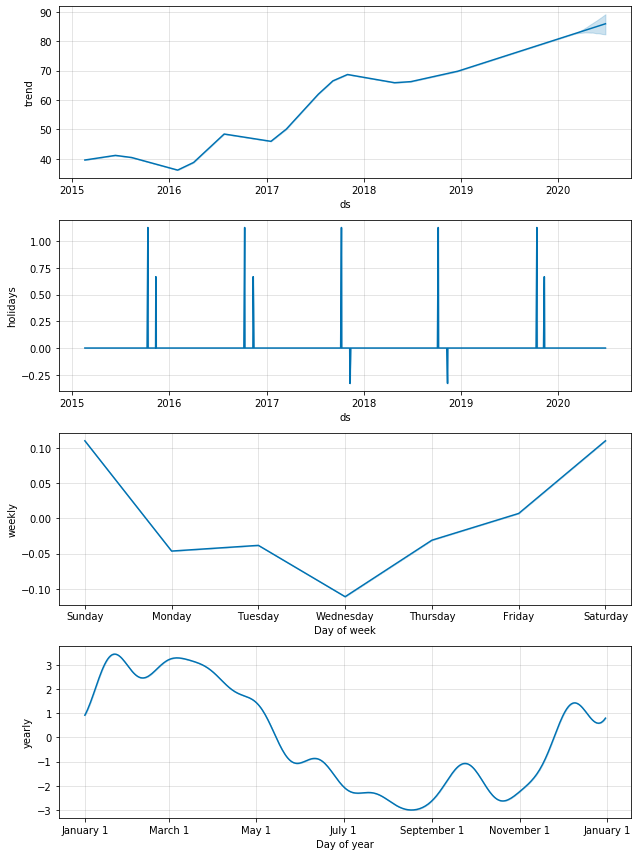

In [10]:
fig4 = p.plot_components(forecast_open)